In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:

worksheet = gc.open('mydata').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})

In [ ]:
dataset1.head()

,Input,Output
0,1.0,6.0
1,2.0,11.0
2,3.0,16.0
3,4.0,21.0
4,5.0,26.0


In [ ]:

X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:

X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
ai_brain = Sequential([
    Dense(6,activation = 'relu'),
    Dense(6,activation = 'relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')

In [ ]:
ai_brain.fit(X_train1,y_train,epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 3319.9058
Epoch 2/2000
1/1 [==============================] - 0s 16ms/step - loss: 3316.8955
Epoch 3/2000
1/1 [==============================] - 0s 13ms/step - loss: 3314.8420
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 3313.3442
Epoch 5/2000
1/1 [==============================] - 0s 13ms/step - loss: 3312.1846
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 3311.1724
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 3310.2283
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 3309.3611
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 3308.5247
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 3307.7163
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 3306.9358
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 3306.2253
Epoch 13

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

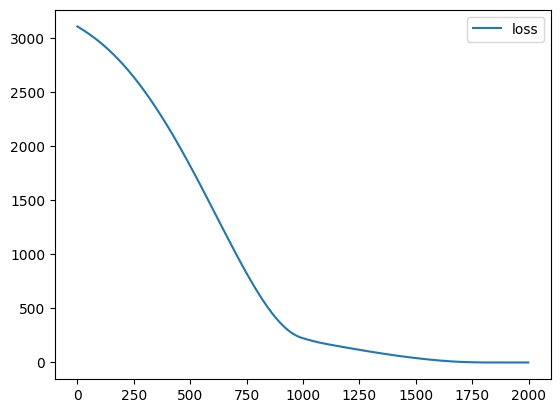

In [ ]:
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 122ms/step - loss: 0.3559


0.3559108078479767

In [ ]:
X_n1 = [[30]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 85ms/step


array([[151.16377]], dtype=float32)